# Building second level models using _nipype_ and _SPM12_

## Template for _megameta_ project

-------
#### History

* 12/119 jahn - tailored for individual bhv change analysis
* 11/6/19 mbod, jeesung, ncooper - testing pipeline code with new individual diff measure to replicate MM report models
* 5/29/19 cscholz - use subject level mreg split up into aversive/nonaversive image projects
* 5/8/19 mbod & bdore - use subject level mreg
* 3/18/19 mbod  - modify example notebook to make template

-----

### Description

* Set up a nipype workflow to use SPM12 to make second (group) level models for _megameta_ task data (preprocessed using `batch8` SPM8 scripts) in BIDS derivative format
* Includes both single sample t-test and multiple regression designs


In [1]:
import json
import os
%matplotlib inline

-------------------

### Step 1: SET NEEDED PARAMETERS

* Specify the following values:
    1. project name - should be name of folder under `/data00/project/megameta`, e.g. `project1`
    2. filename for JSON model specification (should be inside `model_specification` folder), e.g. `p1_image_pmod_likeme.json`
    3. TR value in seconds
 



In [5]:
# only need to change this cell

ROOT_DIR = '/data00/projects/megameta'
GROUP_DIR = '/data00/projects/megameta/group_models/'
PATH_TO_SPM_FOLDER = '/data00/tools/spm12mega/'

contrast_name='loss_vs_gain_message' # same as first level regressor labels
fwhm = [ 8 ] # smoothing kernels
resolutions = ['medium']

MODEL_SPEC_FILE = 'group_FRAMING_prelim_2.json'

mask_path='/data00/tools/spm8/apriori/grey.nii'
# mask = nb.load(mask_path)

In [7]:
JSON_MODEL_FILE = os.path.join('/data00/projects/megameta/scripts/jupyter_megameta/second_level_models',
                               'model_specifications', MODEL_SPEC_FILE)

with open(JSON_MODEL_FILE) as fh:
    model_def = json.load(fh)
    
MODEL_NAME = model_def['ModelName']
print(MODEL_NAME)
print(model_def['Contrasts'])

MESSAGE_PAgoalframing
['loss_vs_gain_message']


In [8]:
output_dir = os.path.join(GROUP_DIR,'derivatives', 'nipype','model_2nd-level_{}'.format(MODEL_NAME),'prelim_PA1PA2WA',contrast_name)        
working_dir = os.path.join(GROUP_DIR, 'working','nipype','workingdir_model_2nd-level_{}'.format(MODEL_NAME),'prelim_PA1PA2WA',contrast_name)

if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print('creating',output_dir)
if not os.path.exists(working_dir):
    os.makedirs(working_dir)
    print('creating',output_dir)

creating /data00/projects/megameta/group_models/derivatives/nipype/model_2nd-level_MESSAGE_PAgoalframing/prelim_PA1PA2WA/loss_vs_gain_message
creating /data00/projects/megameta/group_models/derivatives/nipype/model_2nd-level_MESSAGE_PAgoalframing/prelim_PA1PA2WA/loss_vs_gain_message


* Eligible subkects list (`subjects_list`) is created from checking the `func` folders in BIDS project and finding matching NIFTI files for task.


* You can edit subjects to be included in processing through:
    1. making a list of subject ids to be excluded in `exclude_subjects` list
        - these subjects will be removed from the list of eligible subjects
    2. specifying a list of subject ids to be included in processing in `include_subjects` list
        - the subjects in this list will replace the eligible subjects
    

In [9]:
exclude_subjects=[
'sub-HA01',
'sub-HA03',
'sub-HA04',
'sub-HA07',
'sub-HA08',
'sub-HA17',
'sub-HA19',
'sub-HA38',
'sub-HA43',
'sub-HA52',
'sub-HA56',
'sub-HA59',
'sub-PA001',
'sub-PA002',
'sub-PA004',
'sub-PA013',
'sub-PA015',
'sub-PA022',
'sub-PA023',
'sub-PA024',
'sub-PA026',
'sub-PA030',
'sub-PA033',
'sub-PA039',
'sub-PA042',
'sub-PA043',
'sub-PA044',
'sub-PA045',
'sub-PA051',
'sub-PA053',
'sub-PA059',
'sub-PA062',
'sub-PA064',
'sub-PA066',
'sub-PA069',
'sub-PA070',
'sub-PA072',
'sub-PA073',
'sub-PA075',
'sub-PA076',
'sub-PA078',
'sub-PA079',
'sub-PA081',
'sub-PA083',
'sub-PA087',
'sub-PA091',
'sub-PA092',
'sub-PA096',
'sub-PA097',
'sub-PA099',
'sub-PA104',
'sub-PA105',
'sub-PA106',
'sub-PA110',
'sub-PA115',
'sub-PA117',
'sub-PA118',
'sub-PA119',
'sub-PA121',
'sub-PA123',
'sub-PA124',
'sub-PA127',
'sub-PA128',
'sub-PA129',
'sub-PA130',
'sub-PA131',
'sub-PA134',
'sub-PA138',
'sub-PA139',
'sub-PA140',
'sub-PA151',
'sub-PA152',
'sub-PA155',
'sub-PA161',
'sub-PA168',
'sub-PA171',
'sub-PA178',
'sub-PA184',
'sub-PA186',
'sub-PA187',
'sub-PA190',
'sub-PA193',
'sub-PA195',
'sub-PA198',
'sub-PA199',
'sub-PA203',
'sub-PA204',
'sub-PA205',
'sub-PA211',
'sub-PA215',
'sub-PA216',
'sub-PA217',
'sub-PA218',
'sub-BA224',
'sub-BA228',
'sub-BA233',
'sub-BA239',
'sub-BA267',
'sub-BA272',
'sub-BA276',
'sub-WA110',
'sub-WA204'] 


-------------------------

### Step 2: RUN FIRST LEVEL SETUP NOTEBOOK

In [10]:
%run "second_level_Jeesung_clean.ipynb"    

200414-10:54:12,942 nipype.utils INFO:
	 No new version available.


-------------------------

### Step 3: CHECK WORKFLOW AND DIRECTORIES

In [11]:
# Image(l2analysis.write_graph(graph2use='exec', simple_form=False))

In [12]:
print('Working directory for pipeline is:\n\t',working_dir)

print('\n\nFinal model directory for pipeline is:\n\t',output_dir)

#print('\n\nThese subjects will be processed:\n\t', ' '.join(subject_list))

Working directory for pipeline is:
	 /data00/projects/megameta/group_models/working/nipype/workingdir_model_2nd-level_MESSAGE_PAgoalframing/prelim_PA1PA2WA/loss_vs_gain_message


Final model directory for pipeline is:
	 /data00/projects/megameta/group_models/derivatives/nipype/model_2nd-level_MESSAGE_PAgoalframing/prelim_PA1PA2WA/loss_vs_gain_message


-------------------------

### Step 4: RUN PIPELINE

In [13]:
run_graph=l2analysis.run('Linear') # find participants who both have 1st level models & behavioral measures

200414-10:54:15,662 nipype.workflow INFO:
	 Workflow l2analysis settings: ['check', 'execution', 'logging', 'monitoring']
200414-10:54:15,794 nipype.workflow INFO:
	 Running serially.
200414-10:54:15,796 nipype.workflow INFO:
	 [Node] Setting-up "l2analysis.makecontrasts" in "/fmriNASTest/data00/projects/megameta/group_models/working/nipype/workingdir_model_2nd-level_MESSAGE_PAgoalframing/prelim_PA1PA2WA/loss_vs_gain_message/l2analysis/makecontrasts".
200414-10:54:15,973 nipype.workflow INFO:
	 [Node] Running "makecontrasts" ("nipype.interfaces.utility.wrappers.Function")
excluded subject list:  ['sub-HA01', 'sub-HA03', 'sub-HA04', 'sub-HA07', 'sub-HA08', 'sub-HA17', 'sub-HA19', 'sub-HA38', 'sub-HA43', 'sub-HA52', 'sub-HA56', 'sub-HA59', 'sub-PA001', 'sub-PA002', 'sub-PA004', 'sub-PA013', 'sub-PA015', 'sub-PA022', 'sub-PA023', 'sub-PA024', 'sub-PA026', 'sub-PA030', 'sub-PA033', 'sub-PA039', 'sub-PA042', 'sub-PA043', 'sub-PA044', 'sub-PA045', 'sub-PA051', 'sub-PA053', 'sub-PA059', 'sub-

In [132]:
## inspecting models

import matplotlib.pyplot as plt
from nilearn import plotting, image
from nistats import reporting, design_matrix
import pandas as pd
import scipy.io as sio
import scipy as sp
import numpy as np
from nistats.thresholding import map_threshold
from nistats.second_level_model import SecondLevelModel
import os
import warnings

In [63]:
# if there are multiple regressors
# for c in spm_mat['SPM'].xCon:
#     print(c.name)
# DM = spm_mat['SPM'].xX.X
# regressor_labels = spm_mat['SPM'].xX.name

# design_matrix=pd.DataFrame(DM, columns=regressor_labels)
# fig,ax=plt.subplots(figsize=(10,16))
# reporting.plot_design_matrix(design_matrix, ax=ax, rescale=True)
# plt.show()

In [96]:
# # contrast='pure_message vs. rest'
# mat_dir='/data00/projects/megameta/group_models/derivatives/nipype/model_2nd-level_MESSAGE_pureexposure_prelim/pure_message/contrasts'

# spm_mat = sio.loadmat(os.path.join(mat_dir,'SPM.mat'),
#                  squeeze_me=True, struct_as_record=False)

# print(spm_mat['SPM'].xCon.name)
# print(mat_dir)
# print('N =',len(spm_mat['SPM'].xY.P))
# # spm_mat=sio.loadmat(spmmat_path,squeeze_me=True,struct_as_record=False)
# spm_mat=sio.loadmat(os.path.join(mat_dir,'SPM.mat'),squeeze_me=True, struct_as_record=False)
# # spm_mat

# DM = spm_mat['SPM'].xX.X[:]
# regressor_labels = spm_mat['SPM'].xX.name
# design_matrix=pd.DataFrame(DM)
# fig,ax=plt.subplots(figsize=(2.5,4))
# reporting.plot_design_matrix(design_matrix, ax=ax, rescale=True)
# plt.show()
# img1 = image.load_img(os.path.join(mat_dir,'spmT_0001.nii'))
# plotting.plot_img(img1,title=contrast_name) # static
# plotting.plot_stat_map(img1,title=contrast_name) # static
# plotting.view_img(img1,threshold=5, title='new_pure_message') # interactive

Group
/data00/projects/megameta/group_models/derivatives/nipype/model_2nd-level_MESSAGE_PAgoalframing_prelim/gain_vs_loss_message/PA40excl/contrasts
N = 147


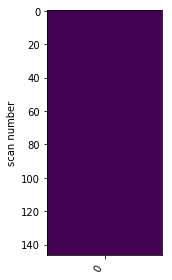

/usr/local/anaconda3/lib/python3.7/site-packages/nilearn/reporting/html_document.py:60: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  MAX_IMG_VIEWS_BEFORE_WARNING))



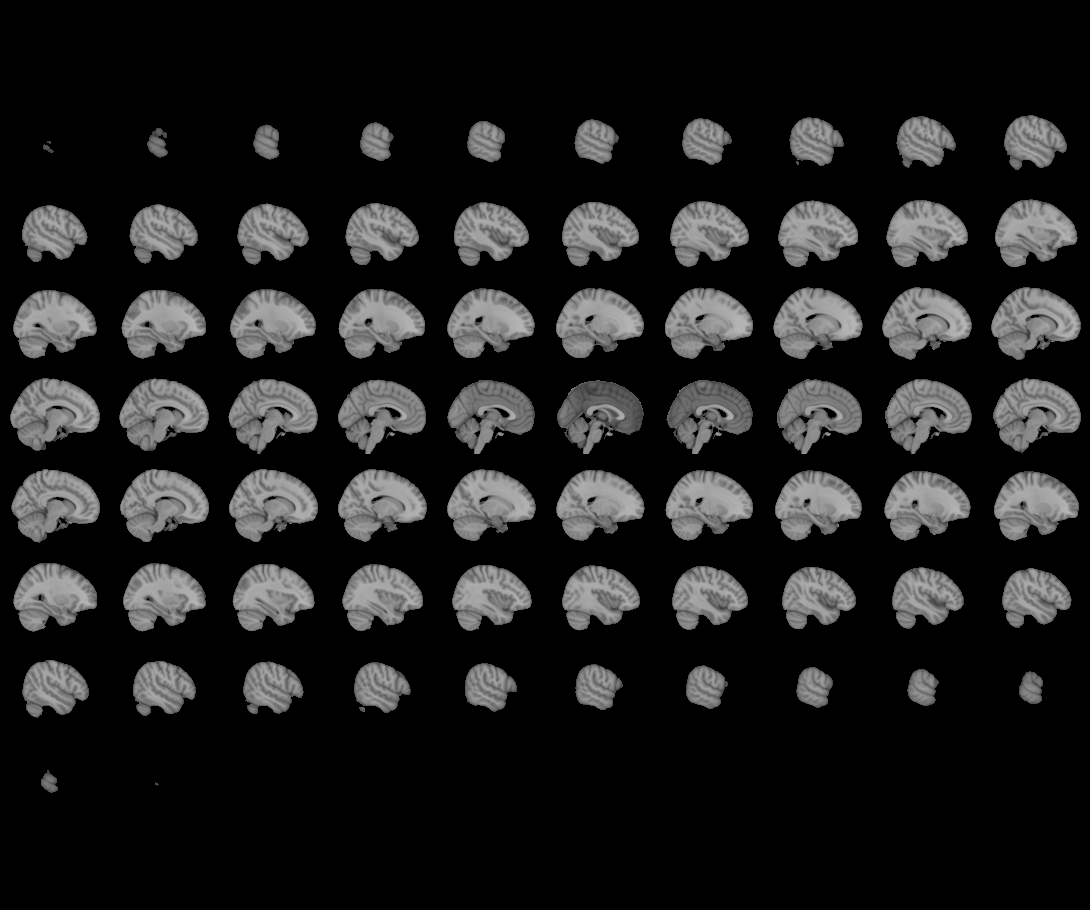
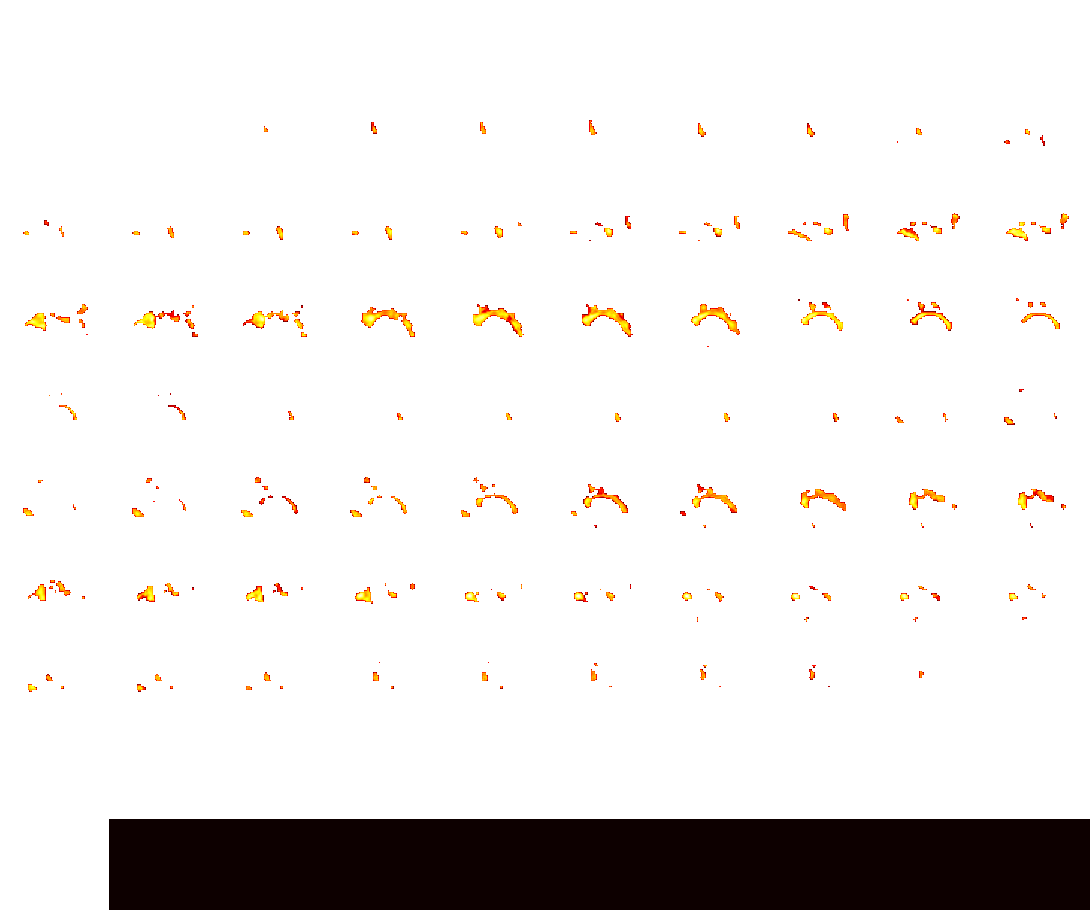

In [134]:
from nistats.thresholding import map_threshold


contrast='gain_vs_loss_message'
# mat_dir='/data00/projects/megameta/group_models/derivatives/nipype/model_2nd-level_MESSAGE_PAgoalframing_prelim/gain_vs_loss_message/contrasts'
mat_dir=os.path.join(output_dir,'contrasts')

spm_mat = sio.loadmat(os.path.join(mat_dir,'SPM.mat'),
                 squeeze_me=True, struct_as_record=False)

print(spm_mat['SPM'].xCon.name)
print(mat_dir)
print('N =',len(spm_mat['SPM'].xY.P))
# spm_mat=sio.loadmat(spmmat_path,squeeze_me=True,struct_as_record=False)
spm_mat=sio.loadmat(os.path.join(mat_dir,'SPM.mat'),squeeze_me=True, struct_as_record=False)
# spm_mat

DM = spm_mat['SPM'].xX.X[:]
regressor_labels = spm_mat['SPM'].xX.name
design_matrix=pd.DataFrame(DM)
fig,ax=plt.subplots(figsize=(2.5,4))
reporting.plot_design_matrix(design_matrix, ax=ax, rescale=True)
plt.show()


img1 = image.load_img(os.path.join(mat_dir,'spmT_0001.nii'))

img1,threshold_fdr= map_threshold(stat_img=img1,alpha=0.05,height_control='fdr',cluster_threshold=0)
# img1,threshold_fwe= map_threshold(stat_img=img1,alpha=0.05,height_control='bonferroni',cluster_threshold=0)
# img1,threshold_fpr= map_threshold(stat_img=img1,alpha=0.005,cluster_threshold=100)

# plotting.plot_img(img1,title=contrast) # static
# plotting.plot_stat_map(img1,threshold=threshold_fdr,title=contrast) # static
plotting.view_img(img1,threshold=threshold_fdr) # interactive

Group
/data00/projects/megameta/group_models/derivatives/nipype/model_2nd-level_MESSAGE_PAgoalframing_prelim/gain_message/contrasts
N = 183


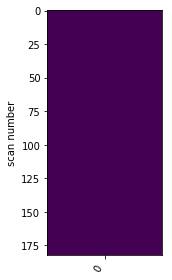

/usr/local/anaconda3/lib/python3.7/site-packages/nilearn/reporting/html_document.py:60: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  MAX_IMG_VIEWS_BEFORE_WARNING))



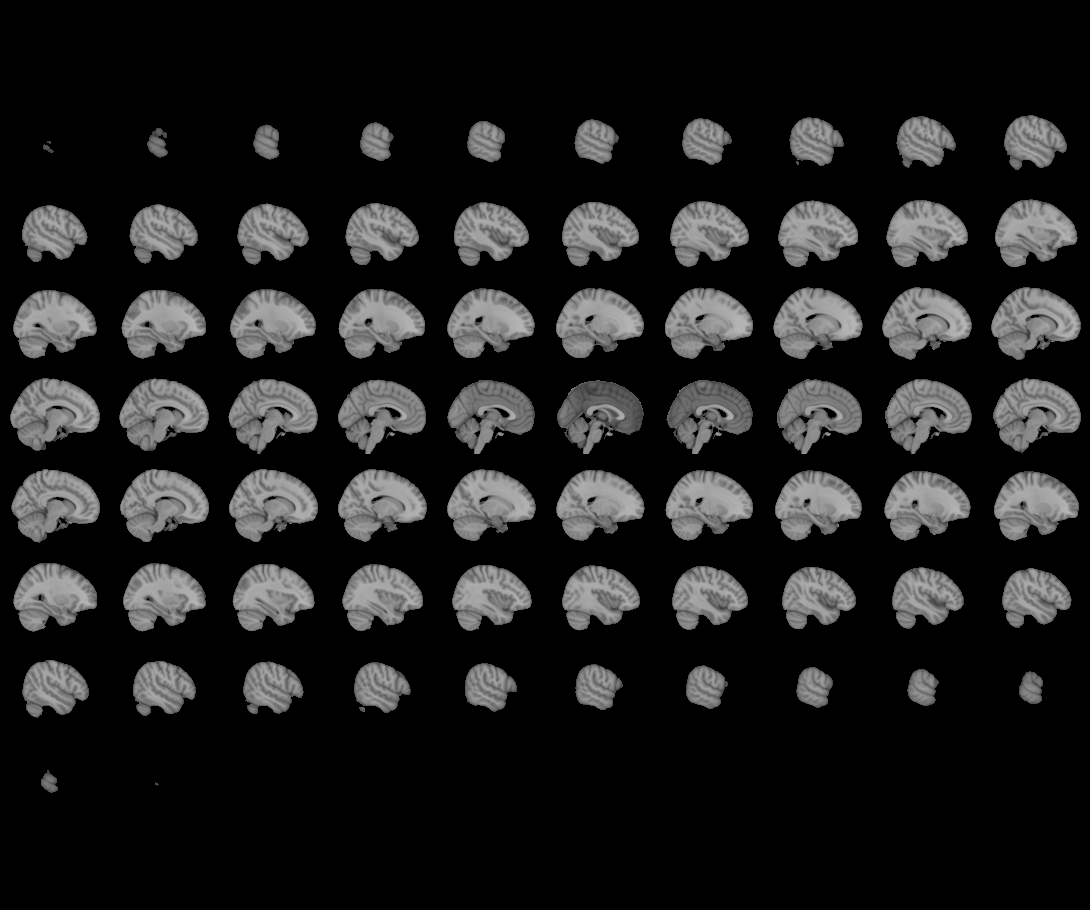
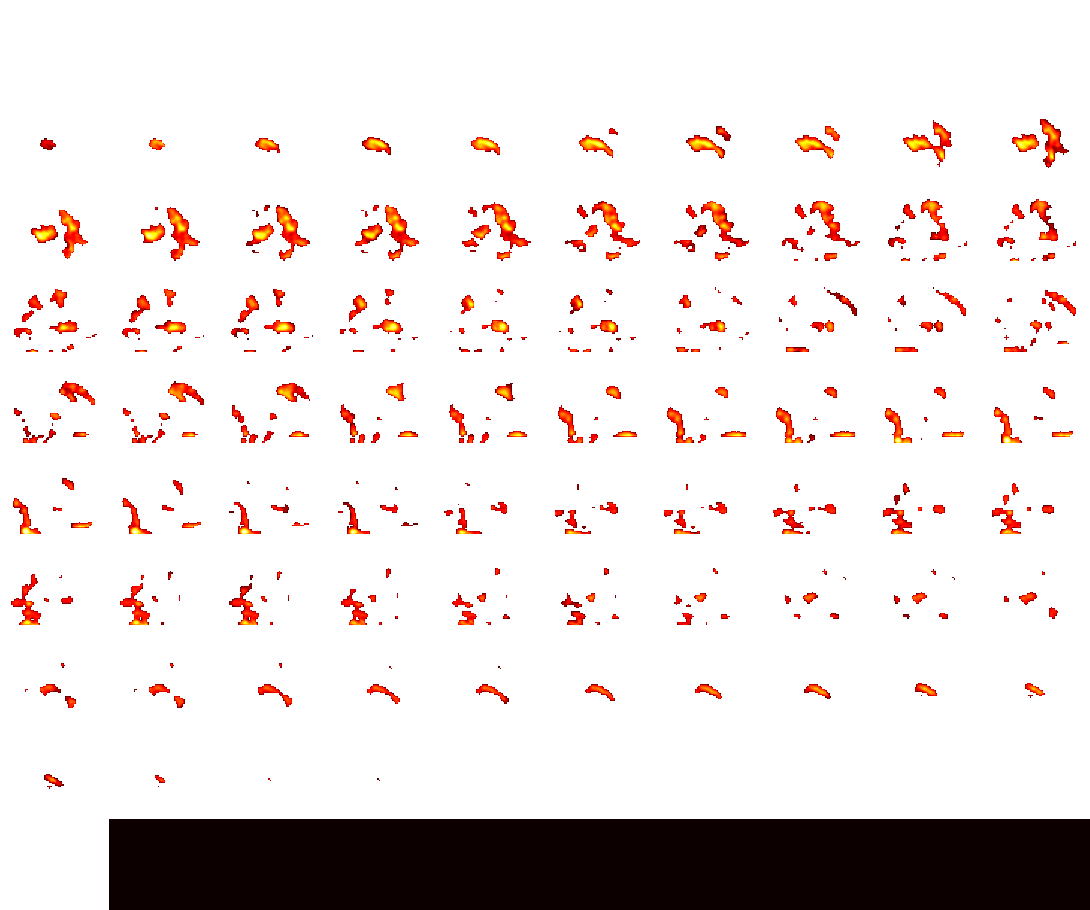

In [107]:
contrast='gain_message'
mat_dir='/data00/projects/megameta/group_models/derivatives/nipype/model_2nd-level_MESSAGE_PAgoalframing_prelim/gain_message/contrasts'

spm_mat = sio.loadmat(os.path.join(mat_dir,'SPM.mat'),
                 squeeze_me=True, struct_as_record=False)

print(spm_mat['SPM'].xCon.name)
print(mat_dir)
print('N =',len(spm_mat['SPM'].xY.P))
# spm_mat=sio.loadmat(spmmat_path,squeeze_me=True,struct_as_record=False)
spm_mat=sio.loadmat(os.path.join(mat_dir,'SPM.mat'),squeeze_me=True, struct_as_record=False)
# spm_mat

DM = spm_mat['SPM'].xX.X[:]
regressor_labels = spm_mat['SPM'].xX.name
design_matrix=pd.DataFrame(DM)
fig,ax=plt.subplots(figsize=(2.5,4))
reporting.plot_design_matrix(design_matrix, ax=ax, rescale=True)
plt.show()
img1 = image.load_img(os.path.join(mat_dir,'spmT_0001.nii'))


img1,threshold_fdr= map_threshold(stat_img=img1,alpha=0.05,height_control='fdr',cluster_threshold=0)
# img1,threshold_fwe= map_threshold(stat_img=img1,alpha=0.05,height_control='bonferroni',cluster_threshold=0)
# img1,threshold_fpr= map_threshold(stat_img=img1,alpha=0.05,cluster_threshold=100)

# plotting.plot_img(img1,title=contrast) # static
# plotting.plot_stat_map(img1,threshold=3.5,title=contrast) # static
# p = plotting.plot_anat(img1) # anatomical
plotting.view_img(img1,threshold=threshold_fdr) # interactive

Group
/data00/projects/megameta/group_models/derivatives/nipype/model_2nd-level_MESSAGE_PAgoalframing_prelim/loss_message/contrasts
N = 183


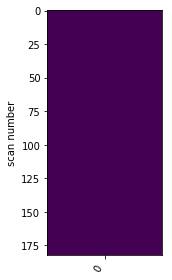

/usr/local/anaconda3/lib/python3.7/site-packages/nilearn/reporting/html_document.py:60: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  MAX_IMG_VIEWS_BEFORE_WARNING))



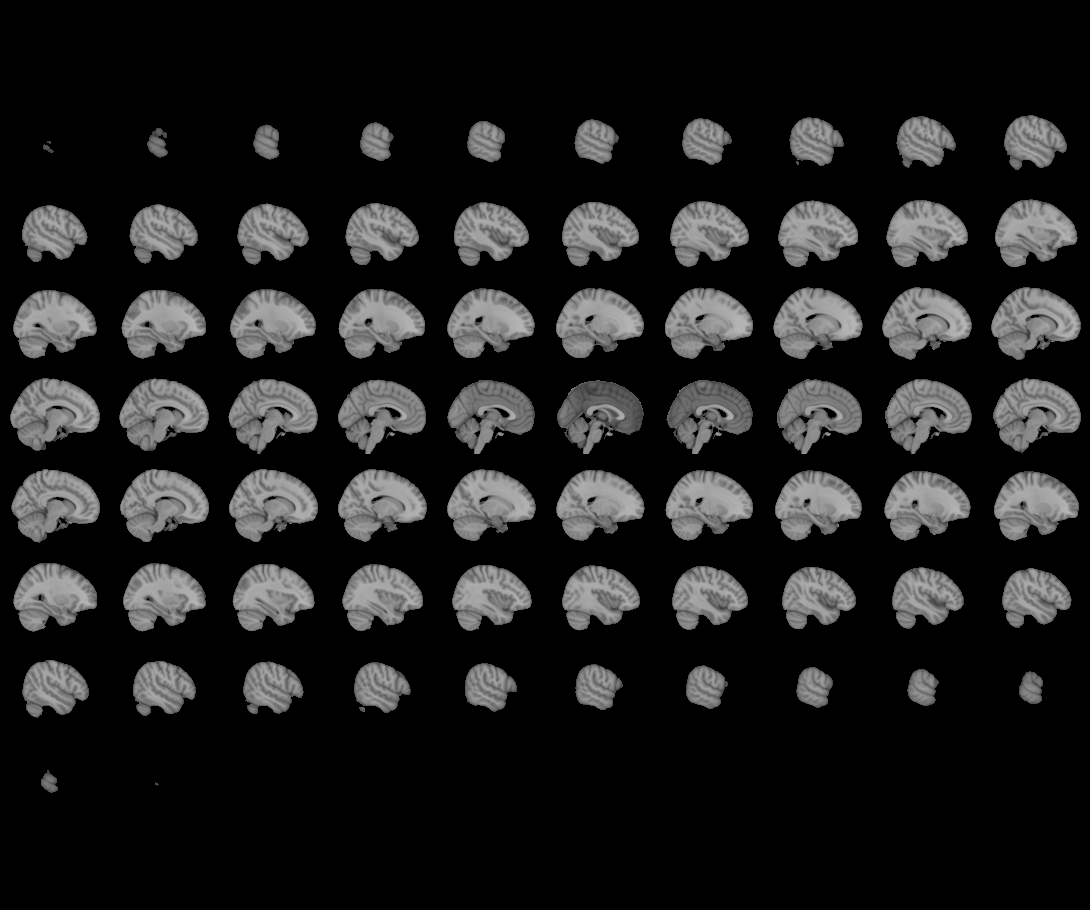
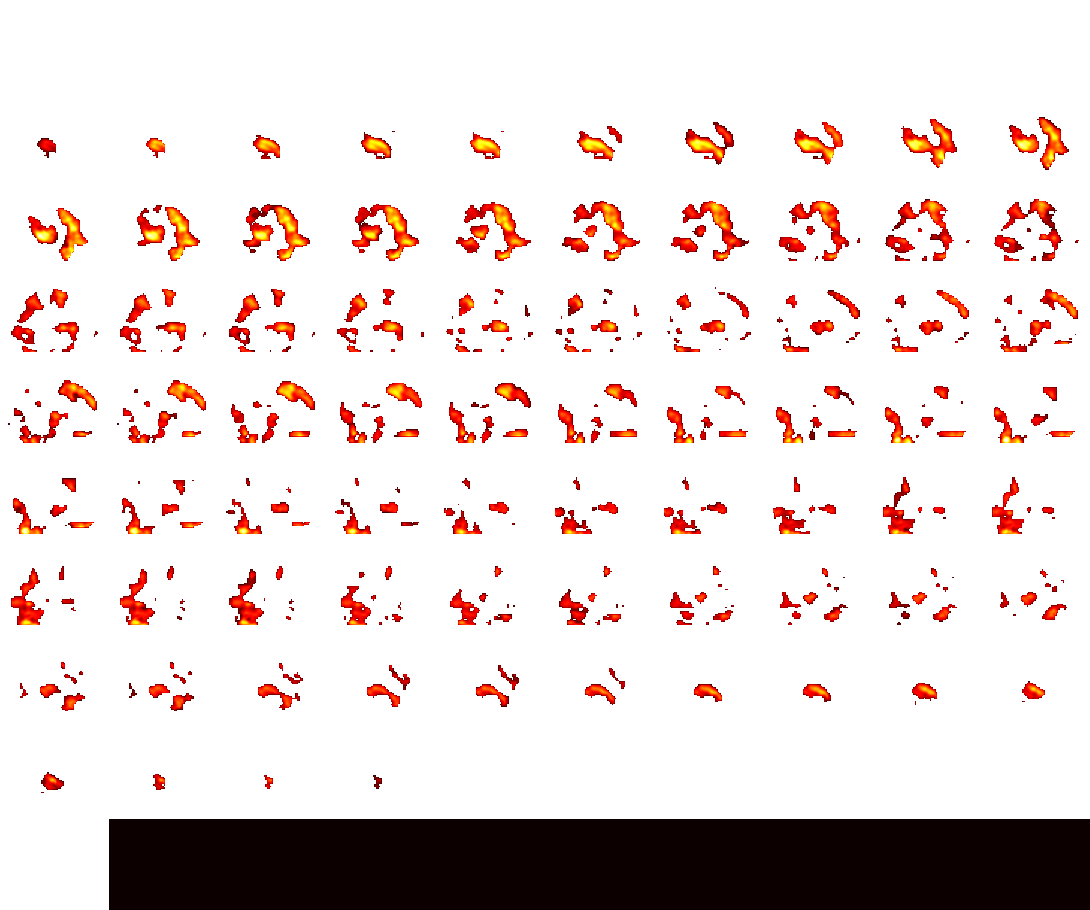

In [105]:
contrast='loss_message'
mat_dir='/data00/projects/megameta/group_models/derivatives/nipype/model_2nd-level_MESSAGE_PAgoalframing_prelim/loss_message/contrasts'

spm_mat = sio.loadmat(os.path.join(mat_dir,'SPM.mat'),
                 squeeze_me=True, struct_as_record=False)

print(spm_mat['SPM'].xCon.name)
print(mat_dir)
print('N =',len(spm_mat['SPM'].xY.P))
# spm_mat=sio.loadmat(spmmat_path,squeeze_me=True,struct_as_record=False)
spm_mat=sio.loadmat(os.path.join(mat_dir,'SPM.mat'),squeeze_me=True, struct_as_record=False)
# spm_mat

DM = spm_mat['SPM'].xX.X[:]
regressor_labels = spm_mat['SPM'].xX.name
design_matrix=pd.DataFrame(DM)
fig,ax=plt.subplots(figsize=(2.5,4))
reporting.plot_design_matrix(design_matrix, ax=ax, rescale=True)
plt.show()
img1 = image.load_img(os.path.join(mat_dir,'spmT_0001.nii'))

img1,threshold_fdr= map_threshold(stat_img=img1,alpha=0.05,height_control='fdr',cluster_threshold=0)

# plotting.plot_img(img1,title=contrast) # static
plotting.view_img(img1,threshold=threshold_fdr) # interactive
# plotting.plot_stat_map(img1,threshold=3.5) # static

In [ ]:
# plotting.plot_stat_map?